In [1]:
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

plt.style.use('seaborn')

In [2]:
X, y = make_regression(n_samples=1000, n_features=1, noise=25)
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)

In [5]:
print('mean input: ', X.values.flatten().mean(), '\nmean output: ', y.values.flatten().mean())

mean input:  0.05158459526804384 
mean output:  3.4752235344062363


<Figure size 600x450 with 0 Axes>

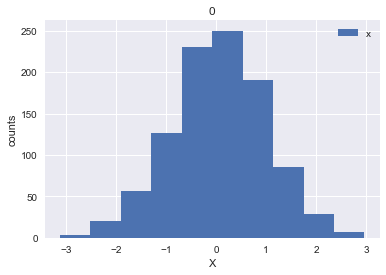

In [6]:
plt.figure(figsize=(4,3), dpi=150);
X.hist();
plt.xlabel('X');
plt.ylabel('counts');
plt.legend('x');

<Figure size 600x450 with 0 Axes>

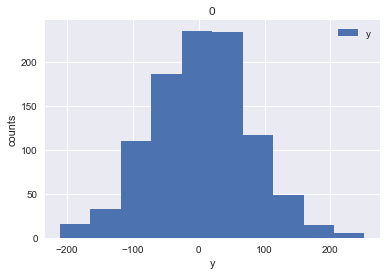

In [7]:
plt.figure(figsize=(4,3), dpi=150);
y.hist();
plt.xlabel('y');
plt.ylabel('counts');
plt.legend('y');

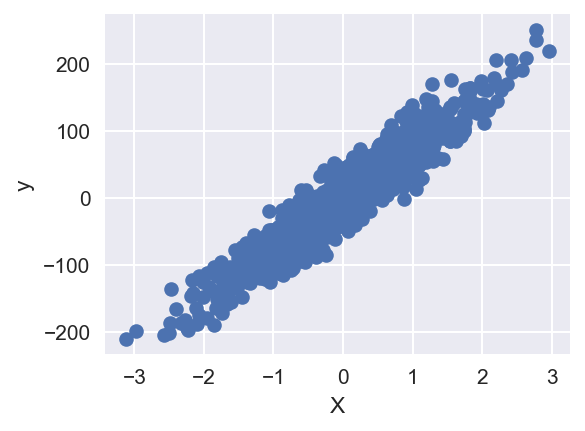

In [15]:
plt.figure(figsize=(4,3), dpi=150);
plt.plot(X,y,'o');
plt.xlabel('X');
plt.ylabel('y');

In [16]:
def computeCoeffs(x,y):
    
    xbar = x.mean();
    ybar = y.mean();
    N = x.size
    
    B0 = (ybar*np.dot(x,x)-xbar*np.dot(x,y))/(np.dot(x,x,)-N*xbar**2)
    B1 = (np.dot(x,y)-N*xbar*ybar)/(np.dot(x,x)-N*xbar**2)
    
    return B0,B1;

In [17]:
b0,b1 = computeCoeffs(X.values.flatten(),y.values.flatten())
print('m: ', b1, 'b: ', b0)

m:  74.86415960610162 b:  -0.3866138389567521


In [18]:
fit = np.polyfit(X.values.flatten(),y.values.flatten(),1)
print('m: ', fit[0], 'b: ', fit[1])
fitfn = np.poly1d(fit)

m:  74.86415960610161 b:  -0.38661383895675105


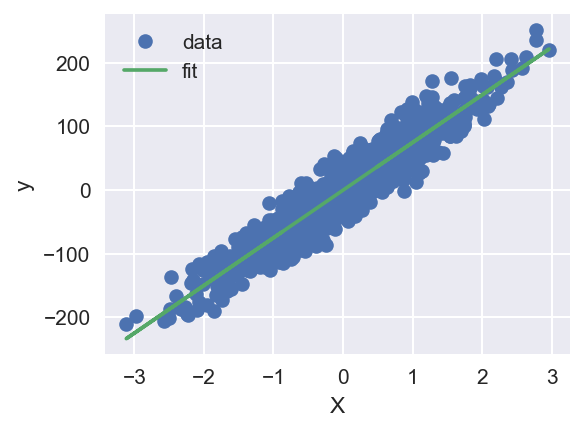

In [24]:
plt.figure(figsize=(4,3), dpi=150);
plt.plot(X, y, 'oC0', X, fitfn(X), '-C1');
plt.xlabel('X');
plt.ylabel('y');
plt.legend(['data','fit']);

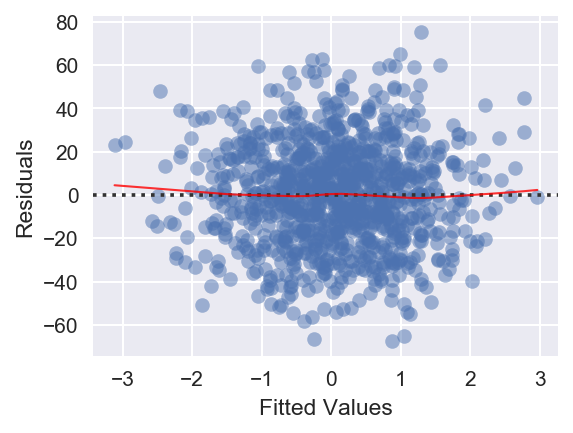

In [25]:
from seaborn import residplot
plt.figure(figsize=(4,3), dpi=150);
residplot(X.values.flatten(), y.values.flatten(), lowess=True,
          scatter_kws={'alpha': 0.5}, 
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.xlabel('Fitted Values');
plt.ylabel('Residuals');

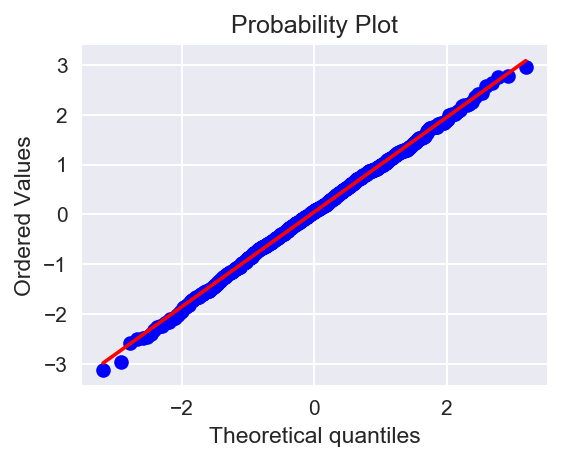

In [26]:
from scipy import stats
plt.figure(figsize=(4,3), dpi=150);
res = stats.probplot(X.values.flatten(), plot=plt);

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [32]:
linearFit = LinearRegression()

X_train=X[:750]
y_train=y[:750]

X_test=X[750:]
y_test=y[750:]

linearFit.fit(X_train, y_train)
y_pred = linearFit.predict(X_test)

In [33]:
print("Coefficient: \n", linearFit.coef_)
print('Intercept: \n', linearFit.intercept_)

Coefficient: 
 [[75.2775336]]
Intercept: 
 [-0.8977229]


In [35]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 628.34


In [36]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.88


In [37]:
print('Explained variance score: %.2f' % explained_variance_score(y_test, y_pred))

Explained variance score: 0.88


In [ ]:
plt.scatter(X_test, y_test, color='C0')
plt.plot(X_test, y_pred, color='C1', linewidth=3)